# 0. Run the backtest code

In [2]:
# Rb 5min test
# !python ../Main.py -o ../Results/Ag_15min_PriceThreshold -c ../Config/Ag_15min_PriceThreshold.json > /dev/null


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Ag - 15min 

In [2]:
Ag_15min_result = GetResult("../Results/Ag_15min_PriceThreshold/")


Tester= 0 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_11.pkl

Tester= 12 |file_path =  ../Results/Ag_15min_PriceThreshold/Result_12.pkl

Tester= 13 |file_path =  ../Results/Ag_15min

## 1.0 Ag - 15min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [3]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Ag_15min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# 1 NO trading cost

## 1.1 Ag --- 15min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

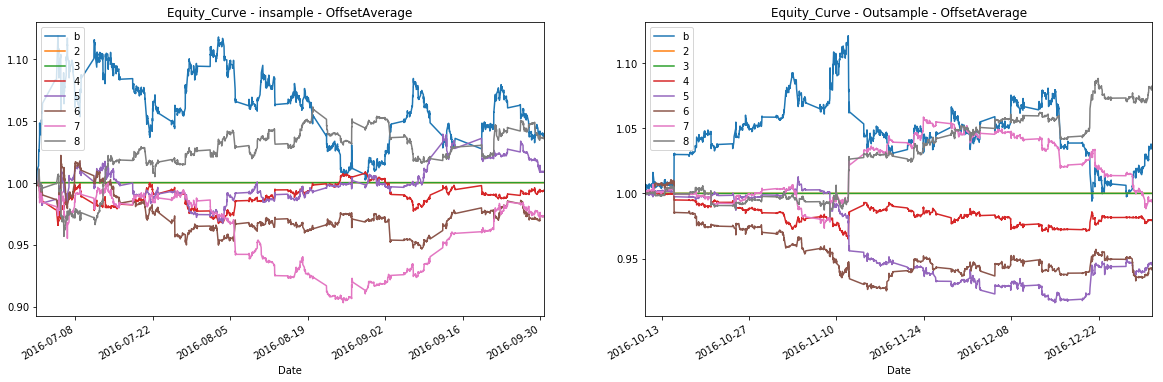

In [4]:
Ag_15min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Ag_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [5]:
Ag_15min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.083334,-0.000074,NaN,NaN,-0.003187,-0.015760,0.006648,-0.040680,NaN,-0.088807,7.0,0.991553,0.080000
3,0.205864,0.000144,-0.010530,0.011227,0.000121,-0.038553,0.040287,-0.119192,1.207110,0.265445,60.4,1.009198,0.477375
4,0.195072,-0.000331,-0.007427,0.008720,-0.000223,-0.033889,0.039806,-0.127653,1.200857,-0.346678,110.6,0.972395,0.439451
5,0.223112,-0.000343,-0.007572,0.007082,-0.000207,-0.040575,0.036821,-0.160900,0.951622,-0.397947,138.8,0.970232,0.496692
6,0.246737,0.000486,-0.007362,0.007171,0.000265,-0.039241,0.040178,-0.124588,0.973498,0.435182,140.6,1.031238,0.520041


In [6]:
Ag_15min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.070716,-0.000289,NaN,NaN,-0.000939,-0.009243,0.010536,-0.044172,NaN,-0.411378,6.4,0.978934,0.051852
3,0.172613,-0.000778,-0.010025,0.010197,-0.001322,-0.049355,0.048960,-0.149134,1.059554,-1.133434,47.8,0.945654,0.418685
4,0.175834,-0.000813,-0.007253,0.006684,-0.000770,-0.042068,0.037288,-0.121691,0.972761,-1.242402,85.8,0.944270,0.456017
5,0.182960,-0.000055,-0.005778,0.006059,-0.000072,-0.034689,0.044457,-0.109613,1.067925,-0.063253,118.8,0.998743,0.475542
6,0.193428,0.001127,-0.005595,0.006865,0.000681,-0.033623,0.053525,-0.092869,1.264394,1.529821,109.4,1.084372,0.495183


## 1.2  Ag --- 15min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

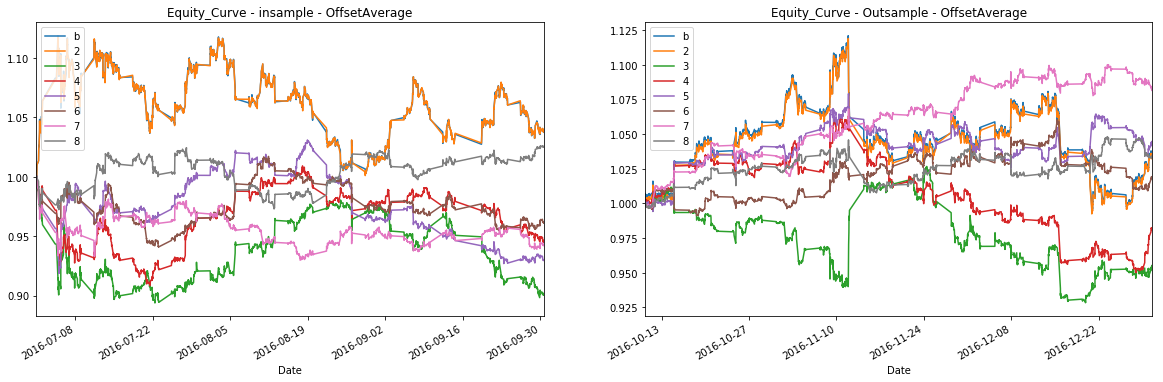

In [8]:
Ag_15min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Ag_15min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [10]:
Ag_15min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.215884,0.000588,NaN,0.044689,0.022345,0.000000,0.044689,-0.105070,NaN,0.680946,2.0,1.037913,0.500000
1,0.256196,-0.001311,-0.003469,0.003275,-0.000206,-0.053980,0.024537,-0.133081,0.947870,-1.295895,497.4,0.898593,0.473026
2,0.234848,-0.000691,-0.003760,0.003880,-0.000115,-0.051343,0.024652,-0.119530,1.034769,-0.720226,428.0,0.942603,0.471089
3,0.240404,-0.000921,-0.003554,0.003635,-0.000124,-0.044871,0.033230,-0.151976,1.021985,-0.986133,485.4,0.928312,0.469780
4,0.241085,-0.000491,-0.003240,0.003398,-0.000064,-0.041383,0.032878,-0.128860,1.049040,-0.437448,535.8,0.960039,0.469286
5,0.217380,-0.000739,-0.003323,0.003383,-0.000106,-0.033985,0.027896,-0.132486,1.018282,-0.898631,506.6,0.941313,0.470454
6,0.220405,0.000350,-0.003545,0.003599,0.000059,-0.030867,0.028130,-0.133274,1.020773,0.428920,441.8,1.020658,0.496619


In [11]:
Ag_15min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.184157,0.000503,NaN,0.035681,0.017840,0.000000,0.035681,-0.113944,NaN,0.682273,2.0,1.031931,0.500000
1,0.197134,-0.000626,-0.002652,0.002897,-0.000127,-0.031732,0.057268,-0.114516,1.092078,-0.786612,424.8,0.953233,0.443259
2,0.191979,-0.000248,-0.003017,0.003250,-0.000090,-0.037860,0.034703,-0.154545,1.096967,-0.510336,370.2,0.984611,0.458784
3,0.170622,0.000629,-0.002738,0.003161,0.000105,-0.034819,0.027202,-0.086746,1.157262,0.943973,400.2,1.041880,0.473626
4,0.178397,0.000273,-0.002795,0.002877,0.000049,-0.035341,0.029500,-0.086216,1.031617,0.485738,439.2,1.017362,0.492116
5,0.162316,0.001124,-0.002666,0.002862,0.000182,-0.027957,0.027686,-0.063600,1.084425,1.783236,431.6,1.081785,0.504261
6,0.163597,0.000495,-0.002943,0.002938,0.000084,-0.037013,0.032284,-0.106397,1.029719,0.926842,380.2,1.036456,0.504037


## 1.3  Ag --- 15min offset average --- price threshold = 0bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

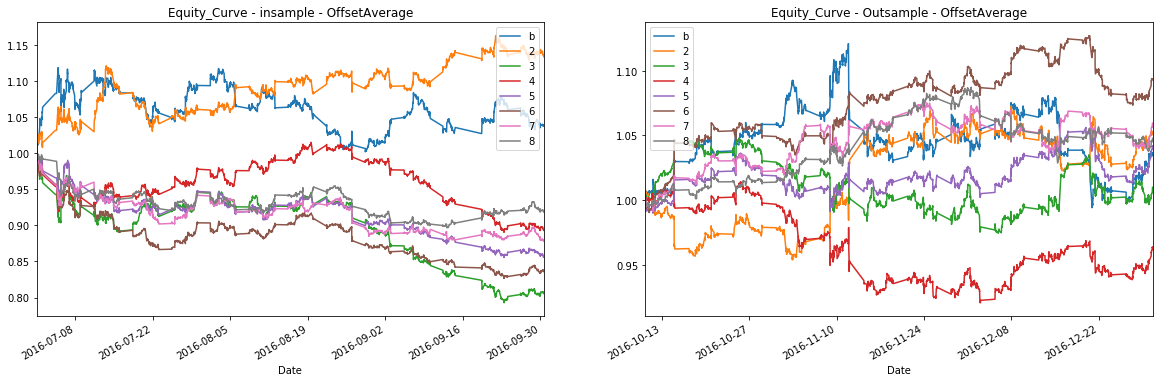

In [12]:
Ag_15min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0])

Benchmark = Ag_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [13]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.201852,0.001736,-0.001628,0.002666,0.000119,-0.026887,0.054021,-0.088319,1.641028,2.148080,1111.8,1.132809,0.393705
1,0.247154,-0.002756,-0.002255,0.001924,-0.000188,-0.055038,0.025953,-0.216065,0.862951,-2.774949,1113.8,0.806976,0.476777
2,0.228466,-0.001412,-0.002085,0.002139,-0.000097,-0.050359,0.024670,-0.158909,1.028429,-1.551180,1111.6,0.893087,0.456267
3,0.227323,-0.001975,-0.002038,0.002022,-0.000128,-0.044806,0.032069,-0.173727,0.993852,-2.182911,1179.6,0.854712,0.452729
4,0.216384,-0.002289,-0.002055,0.001982,-0.000152,-0.042259,0.025813,-0.186107,0.968733,-2.726112,1201.6,0.838359,0.449874
5,0.228950,-0.001664,-0.002091,0.002052,-0.000114,-0.035877,0.026665,-0.184458,0.983085,-1.798878,1158.0,0.877658,0.455126
6,0.212028,-0.001075,-0.002062,0.002032,-0.000069,-0.035784,0.021044,-0.144625,0.987587,-1.237452,1187.4,0.915319,0.465797


In [14]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.174245,0.000751,-0.001360,0.002048,0.000052,-0.026704,0.039753,-0.067781,1.514846,1.146222,1017.4,1.054830,0.399042
1,0.165662,0.000177,-0.001761,0.001652,0.000012,-0.036251,0.031308,-0.089508,0.942918,0.241938,1018.2,1.008543,0.497201
2,0.154528,-0.000492,-0.001723,0.001667,-0.000035,-0.030962,0.021967,-0.112631,0.969212,-0.836593,1015.4,0.963265,0.478595
3,0.154827,0.000600,-0.001583,0.001714,0.000040,-0.028312,0.025842,-0.080375,1.085259,0.939934,1075.8,1.039839,0.472056
4,0.167808,0.001285,-0.001544,0.001714,0.000083,-0.023551,0.027137,-0.080477,1.112798,1.878245,1123.4,1.092839,0.476302
5,0.179952,0.000837,-0.001603,0.001635,0.000055,-0.023797,0.025972,-0.085594,1.023706,1.230153,1093.0,1.058335,0.490239
6,0.159562,0.000677,-0.001663,0.001698,0.000046,-0.023950,0.026476,-0.078647,1.021344,1.063974,1109.8,1.046942,0.487319


## 2 Fixed Trading Cost

## 2.1 Ag --- 15min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

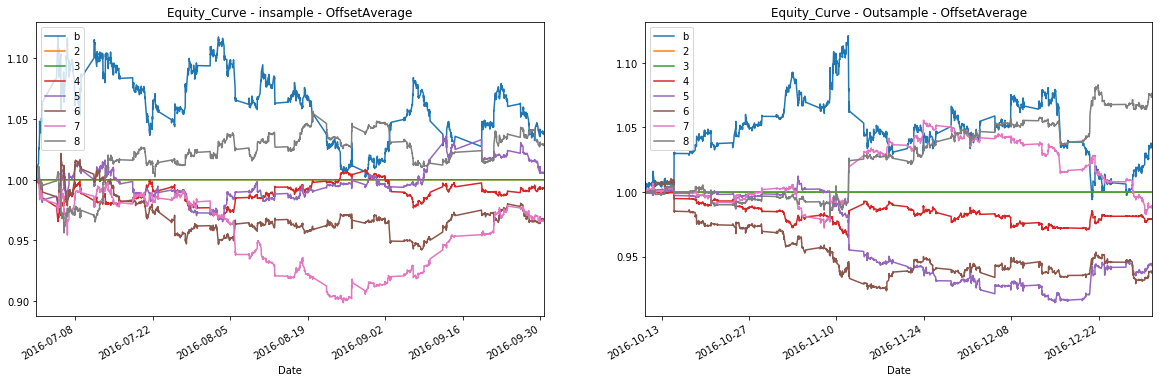

In [17]:
Ag_15min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[10e-4])

Benchmark = Ag_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [18]:
Ag_15min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
1,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
2,0.083388,-7.863365e-05,-0.005684,NaN,-0.003237,-0.015810,0.006598,-0.040797,NaN,-1.182041,7.0,0.991205,0.080000
3,0.205924,1.043069e-04,-0.010115,0.011177,0.000071,-0.038603,0.040237,-0.120016,1.248160,0.216811,60.4,1.006150,0.477375
4,0.195123,-4.038612e-04,-0.007250,0.008699,-0.000273,-0.033939,0.039756,-0.130297,1.223789,-0.439330,110.6,0.967035,0.437616
5,0.223168,-4.338527e-04,-0.007402,0.007056,-0.000257,-0.040625,0.036771,-0.164177,0.969789,-0.500360,138.8,0.963505,0.495066
6,0.246706,3.937559e-04,-0.007176,0.007204,0.000215,-0.039291,0.040128,-0.127104,1.003203,0.340403,140.6,1.024016,0.514212


In [19]:
Ag_15min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
1,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
2,0.070793,-2.931989e-04,-0.002452,NaN,-0.000989,-0.009293,0.010486,-0.044361,NaN,-1.542846,6.4,0.978641,0.051852
3,0.172695,-8.115211e-04,-0.009619,0.010147,-0.001372,-0.049405,0.048910,-0.150194,1.096610,-1.181280,47.8,0.943383,0.418685
4,0.175780,-8.734320e-04,-0.006993,0.006684,-0.000820,-0.042118,0.037238,-0.123298,1.011799,-1.327923,85.8,0.940193,0.452171
5,0.182902,-1.382987e-04,-0.005632,0.006053,-0.000122,-0.034739,0.044407,-0.112378,1.096026,-0.178263,118.8,0.992802,0.472338
6,0.193302,1.049770e-03,-0.005428,0.006868,0.000631,-0.033673,0.053475,-0.094247,1.305213,1.429895,109.4,1.078416,0.491275


## 2.2  Ag --- 15min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

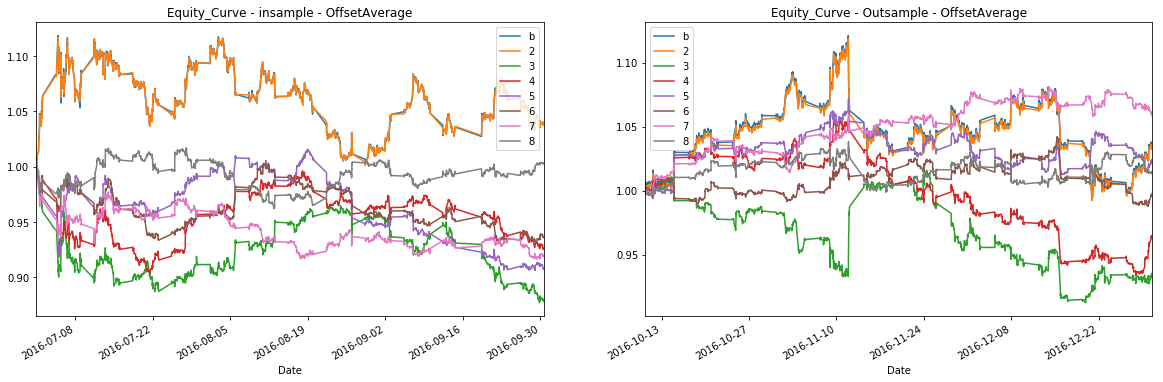

In [20]:
Ag_15min_Offset_Average_5bps = OffSetAverage(FixedCost_Result_Group[5e-4])

Benchmark = Ag_15min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [21]:
Ag_15min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.215802,0.000587,-0.000050,0.044639,0.022295,-0.000050,0.044639,-0.105070,892.785687,0.679682,2.0,1.037809,0.500000
1,0.256352,-0.001638,-0.003319,0.003304,-0.000256,-0.054030,0.024487,-0.144465,0.998542,-1.619978,497.4,0.876553,0.461941
2,0.234690,-0.000973,-0.003641,0.003927,-0.000165,-0.051393,0.024602,-0.124183,1.080257,-1.019470,428.0,0.922735,0.459380
3,0.240210,-0.001240,-0.003433,0.003670,-0.000174,-0.044921,0.033180,-0.160224,1.067247,-1.321093,485.4,0.906269,0.459226
4,0.240829,-0.000844,-0.003120,0.003431,-0.000114,-0.041433,0.032828,-0.141248,1.101324,-0.811292,535.8,0.934733,0.458319
5,0.217338,-0.001073,-0.003211,0.003398,-0.000156,-0.034035,0.027846,-0.143241,1.058673,-1.283632,506.6,0.917824,0.461730
6,0.220416,0.000059,-0.003416,0.003627,0.000009,-0.030917,0.028080,-0.140553,1.068997,0.097915,441.8,0.998347,0.486243


In [22]:
Ag_15min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.184151,0.000501,-0.000050,0.035631,0.017790,-0.000050,0.035631,-0.113944,712.610985,0.680383,2.0,1.031827,0.500000
1,0.197644,-0.000925,-0.002530,0.002891,-0.000177,-0.031782,0.057218,-0.123948,1.140233,-1.165872,424.8,0.933073,0.436939
2,0.191931,-0.000509,-0.002885,0.003280,-0.000140,-0.037910,0.034653,-0.162109,1.154792,-0.849229,370.2,0.966210,0.447599
3,0.170846,0.000348,-0.002645,0.003170,0.000055,-0.034869,0.027152,-0.092946,1.202924,0.527407,400.2,1.021181,0.465226
4,0.178418,-0.000036,-0.002710,0.002872,-0.000001,-0.035391,0.029450,-0.093136,1.063231,0.050528,439.2,0.995310,0.484544
5,0.162337,0.000820,-0.002537,0.002869,0.000132,-0.028007,0.027636,-0.069190,1.140368,1.310749,431.6,1.058643,0.494466
6,0.163465,0.000228,-0.002795,0.002963,0.000034,-0.037063,0.032234,-0.113093,1.090232,0.513392,380.2,1.016876,0.491331


## 2.3  Ag --- 15min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

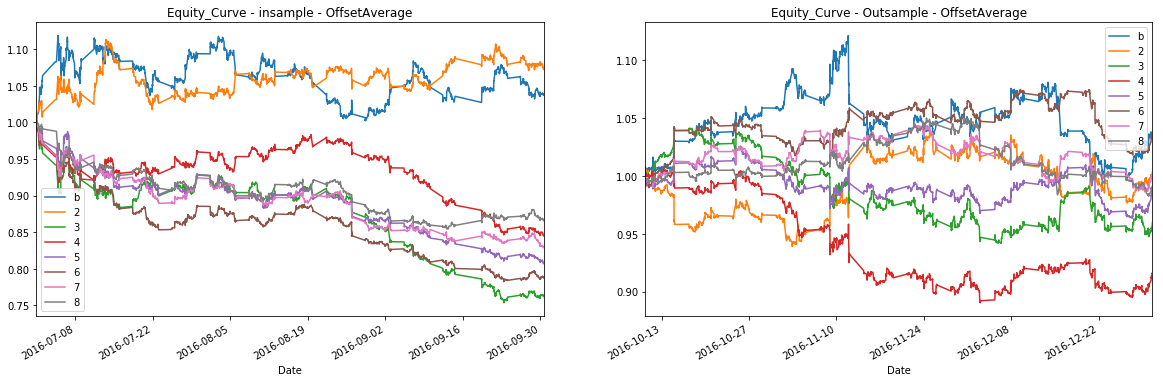

In [24]:
Ag_15min_Offset_Average_0bps = OffSetAverage(FixedCost_Result_Group[0e-4])

Benchmark = Ag_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [25]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.202999,0.001004,-0.001550,0.002714,0.000069,-0.026937,0.053971,-0.095076,1.754950,1.235177,1111.8,1.071544,0.379844
1,0.246718,-0.003488,-0.002109,0.001927,-0.000238,-0.055088,0.025903,-0.250795,0.923316,-3.525698,1113.8,0.763280,0.463851
2,0.227934,-0.002144,-0.001973,0.002154,-0.000147,-0.050409,0.024620,-0.185432,1.093033,-2.363402,1111.6,0.844802,0.442781
3,0.227283,-0.002751,-0.001915,0.002026,-0.000178,-0.044856,0.032019,-0.215567,1.058893,-3.042563,1179.6,0.805733,0.440774
4,0.216344,-0.003080,-0.001911,0.001979,-0.000202,-0.042309,0.025763,-0.230416,1.038872,-3.649995,1201.6,0.789176,0.439675
5,0.228597,-0.002426,-0.001937,0.002049,-0.000164,-0.035927,0.026615,-0.217824,1.059663,-2.645997,1158.0,0.828029,0.444928
6,0.212121,-0.001856,-0.001920,0.002024,-0.000119,-0.035834,0.020994,-0.181972,1.056892,-2.160552,1187.4,0.862575,0.456352


In [26]:
Ag_15min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.175140,0.000035,-0.001295,0.002069,0.000002,-0.026754,0.039703,-0.085612,1.606935,0.116526,1017.4,1.002499,0.385669
1,0.165625,-0.000540,-0.001627,0.001638,-0.000038,-0.036301,0.031258,-0.109716,1.012216,-0.851944,1018.2,0.958492,0.486398
2,0.154320,-0.001208,-0.001604,0.001668,-0.000085,-0.031012,0.021917,-0.138226,1.041411,-2.001556,1015.4,0.915569,0.464590
3,0.155294,-0.000157,-0.001475,0.001709,-0.000010,-0.028362,0.025792,-0.096106,1.160850,-0.283278,1075.8,0.985406,0.460252
4,0.168034,0.000494,-0.001422,0.001708,0.000033,-0.023601,0.027087,-0.096631,1.203040,0.692946,1123.4,1.033221,0.464550
5,0.180088,0.000067,-0.001480,0.001627,0.000005,-0.023847,0.025922,-0.101578,1.102940,0.135547,1093.0,1.002075,0.477917
6,0.159512,-0.000105,-0.001544,0.001685,-0.000004,-0.024000,0.026426,-0.095099,1.091161,-0.177702,1109.8,0.990609,0.476972
